# 🚘 Analyzing SF traffic stops with `R`: Part 3

<img src="img/sf-traffic-3.jpg" alt="traffic" width="400" align="left"/>

This is Part 3. Other parts can be found [here](https://www.jdgrossman.com).

## Introduction

In this series of tutorials, we'll use `R` to explore traffic stops in San Francisco (SF). In particular, we'll investigate whether there is evidence of racial discrimination in SF's policing practices. 

> **Important note**: Policing can be a sensitive subject. It's important to remember that each row in our data represents a real interaction between a police officer and driver. Please keep this in mind as you work through the tutorial, and be sure to engage with the material to the extent you're comfortable. 

By the end of the tutorials, you'll have foundational understanding of the following:
1. 📊 How to use `R` to explore tabular data and calculate descriptive statistics. 
2. 📈 How to make an informative plot with `R`
2. ⚖️ How to approach questions about social policy with data. 

Let's get started!

## ✅ Set up

While the core `R` language contains many useful functions (e.g., `sum` and `sample`), there is vast functionality built on top of `R` by community members.

Make sure to run the cell below. It imports additional useful functions, adjusts `R` settings, and loads in data. 

In [2]:
# Load in additional functions
library(tidyverse)
library(lubridate)

# Use three digits past the decimal point
options(digits = 3)

# This makes our plots look nice!
theme_set(theme_bw())

# This is where the data is stored.
STOPS_PATH = "https://github.com/joshuagrossman/dsb-win-2023/raw/main/opp-munging-plotting/data/sf_stop_data.rds"
POP_PATH = "https://github.com/joshuagrossman/dsb-win-2023/raw/main/opp-munging-plotting/data/sf_pop_2015.rds"

# Read in the data
stops <- read_rds(STOPS_PATH)
pop_2015 <- read_rds(POP_PATH)

# Data modifications from Part 1 and
# additional modification for learning purposes. 
stops_w_yr = stops %>% 
  mutate(
    yr = year(date)
  )

pop_2015 = pop_2015 %>%
  mutate(prop_residents = n_people/sum(n_people))

## 📝 Interpreting racial disparities

In Part 1, we counted the number of stops among drivers each race and ethnicity group for the year 2015.

In [4]:
stops_2015 = stops_w_yr %>%
  filter(yr==2015)

# Note that this code is the same as count(stops_2015, race)
stops_2015 %>%
  group_by(race) %>%
  summarize(n = n()) %>%
  ungroup()

race,n
<chr>,<int>
asian/pacific islander,15498
black,14955
hispanic,11911
other,13560
white,29765


For ease of interpretation, we can add a column with the proportion of all stops that occurred among drivers of each race group:

In [5]:
stop_counts = stops_2015 %>%
  group_by(race) %>%
  summarize(
    n = n()
  ) %>%
  ungroup() %>%
  mutate(
    prop_stops = n/sum(n)
  )

stop_counts

race,n,prop_stops
<chr>,<int>,<dbl>
asian/pacific islander,15498,0.181
black,14955,0.175
hispanic,11911,0.139
other,13560,0.158
white,29765,0.347


### 💬 Discussion

What can we conclude from the table above? 

What are the limitations of this table?

Is there information that could make this table more informative? 

### Double click here to write your thoughts.
\
\
\
\
\
\

## 📝 Incorporating additional data

With the data above, we can claim that most stops in San Francisco in 2015 occurred among white drivers, followed by Asian/Pacific Islander drivers, Black drivers, drivers of an unlisted race/ethnicity, and Hispanic drivers.

However, without knowing the demographics of drivers in San Francisco, we can't say anything about racial disparities in stop rates.

> For example, if 20% of drivers in San Francisco were white, and 35% of stops were among white drivers, we might claim that white drivers were stopped more frequently than expected.

Fortunately, the demographics of San Francisco residents in 2015 are provided in the `pop_2015` data:

In [6]:
pop_2015

race,n_people,prop_residents
<chr>,<dbl>,<dbl>
white,346732,0.4124
black,44879,0.0534
hispanic,128619,0.1530
asian/pacific islander,285266,0.3393
other,35267,0.0419


With the table above, we have more context!

For example, while 5% of San Francisco identifies as Black, nearly 21% of stops occurred among Black drivers. 

### 💬 Discussion

Using only the data above, can we claim that Black drivers in SF were stopped on the basis of less evidence than drivers of other race groups? Do your conclusions depend on any assumptions?

### Double click here to write your thoughts.
\
\
\
\
\
\

## 📝 Merging data

Suppose we are interested in the ratio of the stop rate for each race/ethnicity group and the fraction of residents from each race/ethnicity group.

We could do this by hand, but it's a little tedious.

In [7]:
print('Asian/Pacific Islander drivers: stop rate / pop. rate:')
0.181/0.3393

print('Black drivers: stop rate / pop. rate:')
0.175/0.0534

print('Hispanic drivers: stop rate / pop. rate:')
0.139/0.1530

print('White drivers: stop rate / pop. rate:')
0.347/0.4124

print('Drivers of other race/ethnicity: stop rate / pop.rate:')
0.158/0.0419

[1] "Asian/Pacific Islander drivers: stop rate / pop. rate:"


[1] 0.533

[1] "Black drivers: stop rate / pop. rate:"


[1] 3.28

[1] "Hispanic drivers: stop rate / pop. rate:"


[1] 0.908

[1] "White drivers: stop rate / pop. rate:"


[1] 0.841

[1] "Drivers of other race/ethnicity: stop rate / pop.rate:"


[1] 3.77

It would be a lot faster if we had the stop rates and pop. rates in one table.

### 🧑‍🤝‍🧑 Joining data with shared columns

Imagine writing our two tables side by side. Here's a (bad!!) way to do it:

In [8]:
# Reminder: this is generally NOT a good thing to do to merge data.
# We're doing this just for the visual!
bind_cols(stop_counts, pop_2015)

New names:
• `race` -> `race...1`
• `race` -> `race...4`


race...1,n,prop_stops,race...4,n_people,prop_residents
<chr>,<int>,<dbl>,<chr>,<dbl>,<dbl>
asian/pacific islander,15498,0.181,white,346732,0.4124
black,14955,0.175,black,44879,0.0534
hispanic,11911,0.139,hispanic,128619,0.1530
other,13560,0.158,asian/pacific islander,285266,0.3393
white,29765,0.347,other,35267,0.0419


☝️ There's a big problem with the table above: the race columns are not aligned!

> For example, Asian/Pacific Islander driver stop rates are next to white driver pop. rates. This is not good!

Better idea: what if we could combine each row of our tables by making sure the value in the race column is the same in both rows?

Here's how to do it:

In [9]:
combined_data = left_join(stop_counts, pop_2015, by='race')

combined_data

race,n,prop_stops,n_people,prop_residents
<chr>,<int>,<dbl>,<dbl>,<dbl>
asian/pacific islander,15498,0.181,285266,0.3393
black,14955,0.175,44879,0.0534
hispanic,11911,0.139,128619,0.1530
other,13560,0.158,35267,0.0419
white,29765,0.347,346732,0.4124


The next section will break down this code.

### 💫 The magic of `left_join`

`left_join()` only needs three things from you:
1. What's the first table?
2. What's the second table?
3. Which column should match?

🖥️ Usage: `left_join(table1, table2, by='column_name')`
* `table1`: the first table (i.e., 'left table')
* `table2`: the second table (i.e., 'right table')
* `column_name`: the name of the column to match

But, we've left one question unanswered: why `left_join()` and not just `join()`?

Here's a visual explanation.

> Note: `NA` indicates a missing value that is "not available".

<img src="img/left_join_updated.png" alt="inner join" width="400" align="left"/>

`left_join()` always returns every row in the **left** table. 

- However, `left_join()` only includes rows from the **right** table that can be matched to rows in the **left** table.

- The matched column is often referred to as the "join key". That's why it's named `key` in the picture.

- Unmatched rows from the **right** table are dropped.

Here's the picture in code form. Play around with the code to get a feel for `left_join()`!

In [10]:
table1 = tibble(
    val_x = c('x1', 'x2', 'x3'),
    key = c(1, 2, 3)
)

table2 = tibble(
    val_y = c('y1', 'y2', 'y3'),
    key = c(1, 2, 4)
)

table1
table2
left_join(table1, table2, by='key')

val_x,key
<chr>,<dbl>
x1,1
x2,2
x3,3


val_y,key
<chr>,<dbl>
y1,1
y2,2
y3,4


val_x,key,val_y
<chr>,<dbl>,<chr>
x1,1,y1
x2,2,y2
x3,3,NA


### 🙀 `right_join()`, `inner_join()`, `anti_join()`, [oh my](https://www.youtube.com/watch?v=-HrfbV16-FQ)!

There are actually a few more joining functions. But, **you only need left join for >99% of data science work**. 

#### 🚀 Mini-exercise

Run the three joining functions in the cell below. 

> The arguments of `right_join()`, `inner_join()`, and `anti_join()` are the same as `left_join()` above.

What do these three new joining functions do?

In [11]:
table1 = tibble(
    val_x = c('x1', 'x2', 'x3'),
    key = c(1, 2, 3)
)

table2 = tibble(
    val_y = c('y1', 'y2', 'y3'),
    key = c(1, 2, 4)
)

# Your code here!

# START

# same as left join, but in reverse`
right_join(table1, table2, by='key')

# only keeps the rows that match
inner_join(table1, table2, by='key')

# only keep the rows in the left table that DON'T match
anti_join(table1, table2, by='key')

# `left_join()` can replicate all of these!

# equivalent to the right join code
left_join(table2, table1, by='key')

# equivalent to the inner join code
left_join(table1, table2, by='key') %>% 
    filter(! is.na(val_y))

# equivalent to the anti join code
left_join(table1, table2, by='key') %>% 
    filter(is.na(val_y)) %>%
    select(-val_y)

# END

val_x,key,val_y
<chr>,<dbl>,<chr>
x1,1,y1
x2,2,y2
NA,4,y3


val_x,key,val_y
<chr>,<dbl>,<chr>
x1,1,y1
x2,2,y2


val_x,key
<chr>,<dbl>
x3,3


val_y,key,val_x
<chr>,<dbl>,<chr>
y1,1,x1
y2,2,x2
y3,4,NA


val_x,key,val_y
<chr>,<dbl>,<chr>
x1,1,y1
x2,2,y2


val_x,key
<chr>,<dbl>
x3,3


## 🚀 Exercise: Putting it all together

In this exercise, you may find it helpful to refer to code from Parts 1 and 2. You can find Parts 1 and 2 [here](https://www.jdgrossman.com).

#### Part A

Calculate the proportion of all stops, searches, and contraband detections that occurred for SF drivers of each race and ethnicity group in 2015.

What do you conclude from your findings? How could someone use these results to mislead their audience?

In [12]:
# Your code here!

# As a reminder, here's how we did this for stops:
stop_counts = stops_2015 %>%
  group_by(race) %>%
  summarize(n = n()) %>%
  ungroup()

# START

df = stops_2015 %>%
  group_by(race) %>%
  summarize(
    n_stops = n(),
    n_searches = sum(searched),
    n_contraband = sum(contraband_found, na.rm=TRUE)
  ) %>%
  ungroup() %>%
  mutate(
    p_stops = n_stops/sum(n_stops),
    p_searches = n_searches/sum(n_searches),
    p_contraband = n_contraband/sum(n_contraband)
  )

df

# END

race,n_stops,n_searches,n_contraband,p_stops,p_searches,p_contraband
<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
asian/pacific islander,15498,194,73,0.181,0.0463,0.0951
black,14955,2341,306,0.175,0.5591,0.3984
hispanic,11911,760,144,0.139,0.1815,0.1875
other,13560,233,50,0.158,0.0556,0.0651
white,29765,659,195,0.347,0.1574,0.2539


#### Part B

For each race and ethnicity group, calculate the ratio of stop rates, search rates, and contraband detection rates to the population rate for 2015.

What do you conclude from your findings? How could someone use these results to mislead their audience?

In [13]:
# Your code here!

# START

df_w_ratios = df %>%
  left_join(pop_2015, by='race') %>%
  mutate(
    stop_ratio = p_stops / prop_residents,
    search_ratio = p_searches / prop_residents,
    contraband_ratio = p_contraband / prop_residents
  )

# select relevant columns to avoid scrolling left and right
df_w_ratios %>%
  select(
    race,
    stop_ratio,
    search_ratio,
    contraband_ratio
  )

# END


race,stop_ratio,search_ratio,contraband_ratio
<chr>,<dbl>,<dbl>,<dbl>
asian/pacific islander,0.533,0.137,0.280
black,3.270,10.474,7.464
hispanic,0.909,1.187,1.226
other,3.773,1.327,1.552
white,0.842,0.382,0.616


#### Part C

First, filter the `stops` data to drivers who identify as Black. 

Second, for Black drivers in each district, calculate the fraction of stops that resulted in a search ("search rate"). Store your result in a dataframe.

Repeat the first two steps for all race/ethnicity groups in the data. 

In [14]:
# Your code here!

# START

black_df = stops %>%
  filter(race == 'black') %>%
  group_by(district) %>%
  summarize(
    n_stops = n(),
    search_rate = sum(searched)/n_stops
  )

white_df = stops %>%
  filter(race == 'white') %>%
  group_by(district) %>%
  summarize(
    n_stops = n(),
    search_rate = sum(searched)/n_stops
  )

black_df

# END


district,n_stops,search_rate
<chr>,<int>,<dbl>
A,6126,0.1086
B,11760,0.1541
C,35084,0.1743
D,9548,0.1811
E,8712,0.1769
F,4572,0.0930
G,3396,0.0801
H,11665,0.1428
I,5780,0.1244


❗❗Important note❗❗: You are encouraged to repeat Parts D, E, and F using different pairs of race/ethnicity groups.

#### Part D

For each district, calculate the difference in search rates of Black drivers and white drivers. 

> This will require you to merge two dataframes that you created in Part C.

What do you conclude from your findings? How could you present this result concisely to a non-technical audience?

In [15]:
# Your code here!

# START

merged_df = left_join(black_df, white_df, by='district')

# note that we have duplicate column names, so R adds the `.x` and `.y` suffixes
head(merged_df)

# here's how we can use our own, more useful suffixes
merged_df = left_join(black_df, white_df, by='district', suffix=c('_black', '_white'))

head(merged_df)

# END

district,n_stops.x,search_rate.x,n_stops.y,search_rate.y
<chr>,<int>,<dbl>,<int>,<dbl>
A,6126,0.109,24262,0.0279
B,11760,0.154,36269,0.0301
C,35084,0.174,13377,0.0481
D,9548,0.181,30234,0.0322
E,8712,0.177,24725,0.0361
F,4572,0.093,25794,0.0197


district,n_stops_black,search_rate_black,n_stops_white,search_rate_white
<chr>,<int>,<dbl>,<int>,<dbl>
A,6126,0.109,24262,0.0279
B,11760,0.154,36269,0.0301
C,35084,0.174,13377,0.0481
D,9548,0.181,30234,0.0322
E,8712,0.177,24725,0.0361
F,4572,0.093,25794,0.0197


#### Part E

Using your merged data from Part D, create a plot with the following features:
- On the x-axis, plot the search rate for Black drivers.
- On the y-axis, plot the search rate for white drivers.
- Color the points by district
- Add (`+`) the following lines to your plotting code: 

```
geom_abline(linetype = 'dashed') +
xlim(0, 0.5) +
ylim(0, 0.5)
```

What do you conclude from your findings?

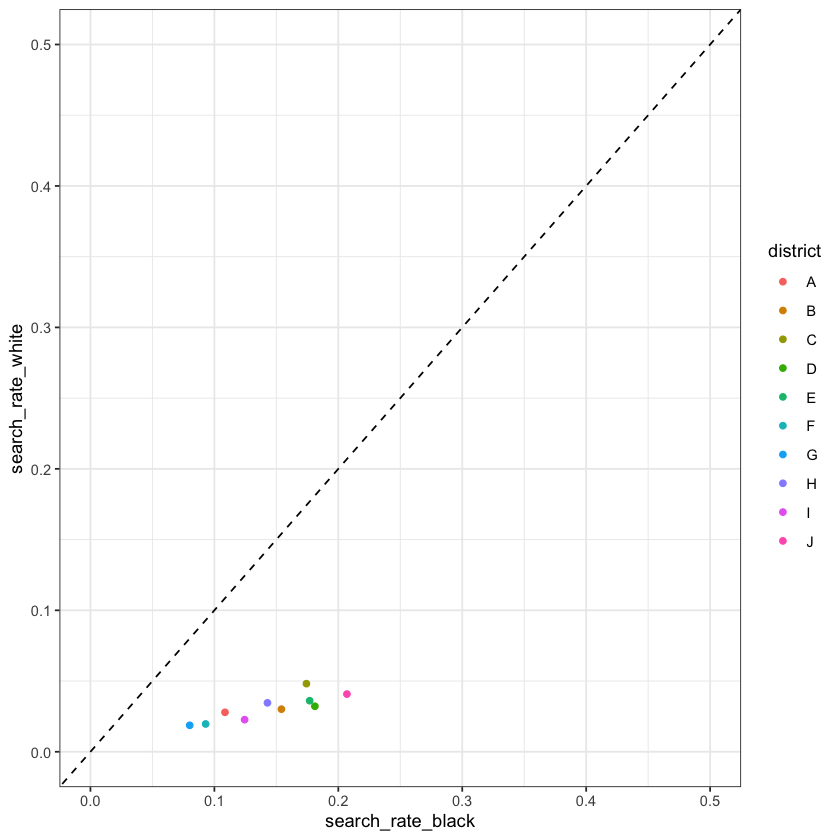

In [16]:
# Your code here!

# START

merged_df %>%
  ggplot(aes(x=search_rate_black, y=search_rate_white, color=district)) +
  geom_point() +
  geom_abline(linetype='dashed') +
  xlim(0,0.5) +
  ylim(0,0.5)

# END

#### Part F

Repeat Parts D and E, but instead of calculating search rates, calculate the proportion of searches that resulted in contraband being found ("hit rate").

What do you conclude from your findings?

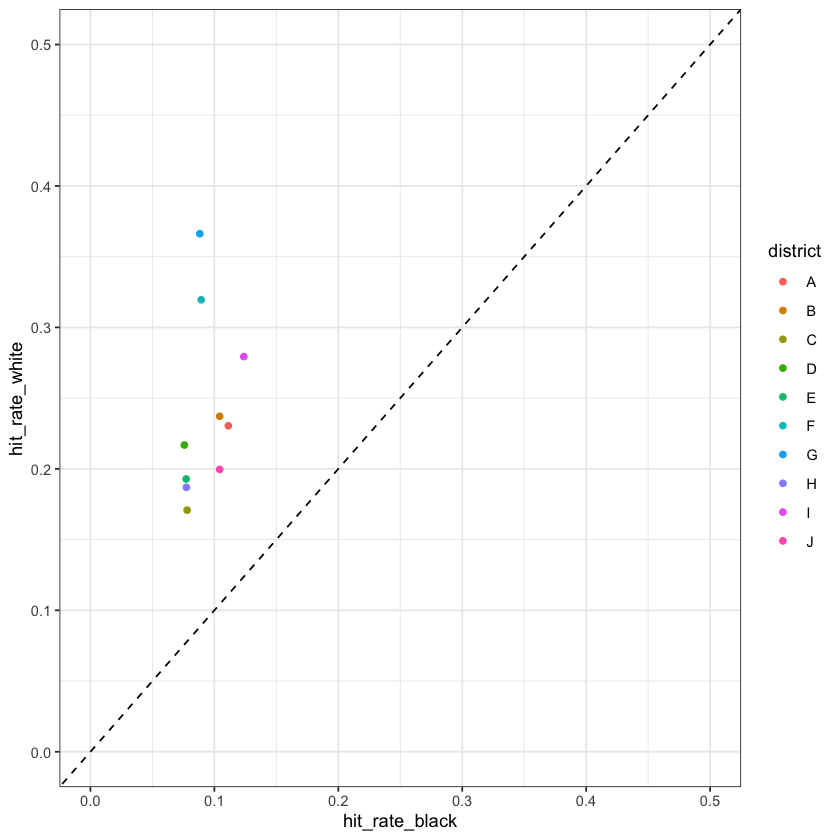

In [17]:
# Your code here!

# START

black_df = stops %>%
  filter(race == 'black') %>%
  group_by(district) %>%
  summarize(
    hit_rate = sum(contraband_found, na.rm=TRUE) / sum(searched)
  )

white_df = stops %>%
  filter(race == 'white') %>%
  group_by(district) %>%
  summarize(
    hit_rate = sum(contraband_found, na.rm=TRUE) / sum(searched)
  )

merged_df = left_join(black_df, white_df, by='district', suffix=c('_black', '_white'))


merged_df %>%
  ggplot(aes(x=hit_rate_black, y=hit_rate_white, color=district)) +
  geom_point() +
  geom_abline(linetype='dashed') +
  xlim(0,0.5) +
  ylim(0,0.5)

# END

## Concluding remarks

In the final exercise of this tutorial, you conducted an **outcome test**. 

> Figure 3 in [this paper](https://5harad.com/papers/100M-stops.pdf) shows the result of an outcome test applied to large-scale policing data. 

Outcome tests can be used to detect potential discrimination not just in policing.
For example, think about how you might use an outcome test to detect discrimination in bank lending or hiring decisions.